In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (18, 10)
plt.rcParams['axes.titlesize'] = 16

## Database Overview

This database contains hundreds of thousands of reports damage caused by birds to aircraft over the years in the United States. Most reports contain detailed information about the incident, that can be interesting to explore.

In [53]:
typeSpecification = {"Aircraft Model": str, "Engine Model": str, "Engine3 Position": str, "Engine1 Position": str}
df = pd.read_csv('../database/aircraft_wildlife_strikes.zip', compression='zip', dtype=typeSpecification)
df.head(10)

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
5,129734,1990,1,4,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
6,129735,1990,1,5,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7,129736,1990,1,5,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8,129737,1990,1,6,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9,127848,1990,1,7,EME,METRO EXPRESS,DHC8 DASH 8,A,303,10,...,0,0,0,0,0,0,0,0,0,0


There is a lot of information on this database, so we need to know more about the data. Taking a look at the columns can give some ideas.

In [54]:
df.columns

Index(['Record ID', 'Incident Year', 'Incident Month', 'Incident Day',
       'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make',
       'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model',
       'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position',
       'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport',
       'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
       'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID',
       'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities',
       'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Win

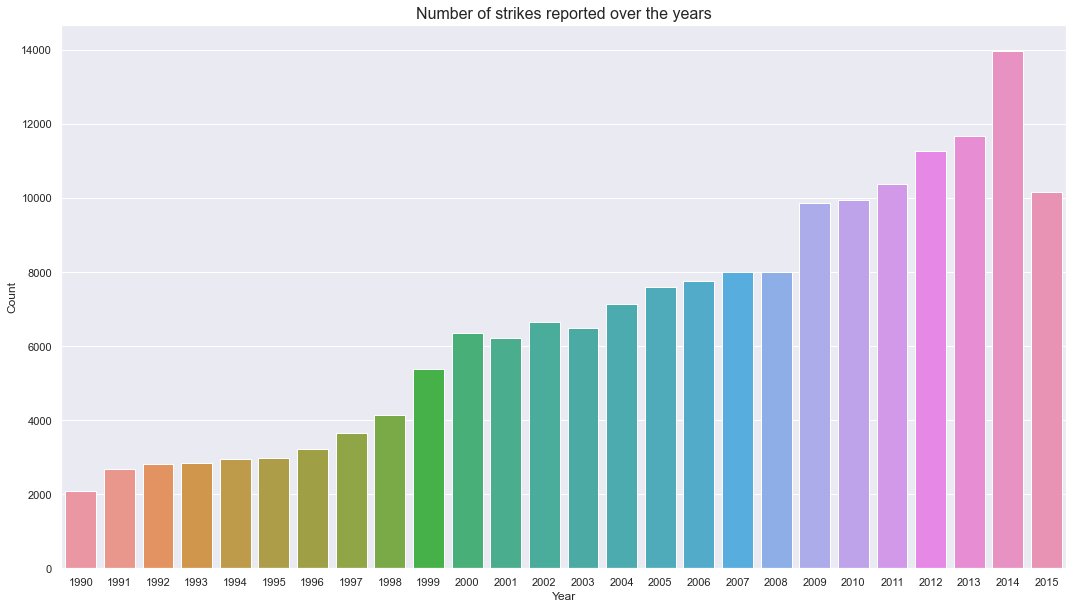

In [55]:
incidents_by_years = (df.groupby('Incident Year')
                      .agg({'Record ID': 'count'}).reset_index()
                      .rename(columns={'Record ID': 'Count', 'Incident Year': 'Year'}))
sns.barplot(data=incidents_by_years, x='Year', y='Count')
plt.title('Number of strikes reported over the years')
plt.show()

We can observe a predominant increase in the number of reports over the years. Looking more carefully to the records of 2015, we note that there is no incident reported since `October`, which strongly indicates that the data collected since then wasn't included in the database.

In [56]:
df.query("`Incident Year` == 2015")["Incident Month"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

### Which Bird Species are more involved in accidents?

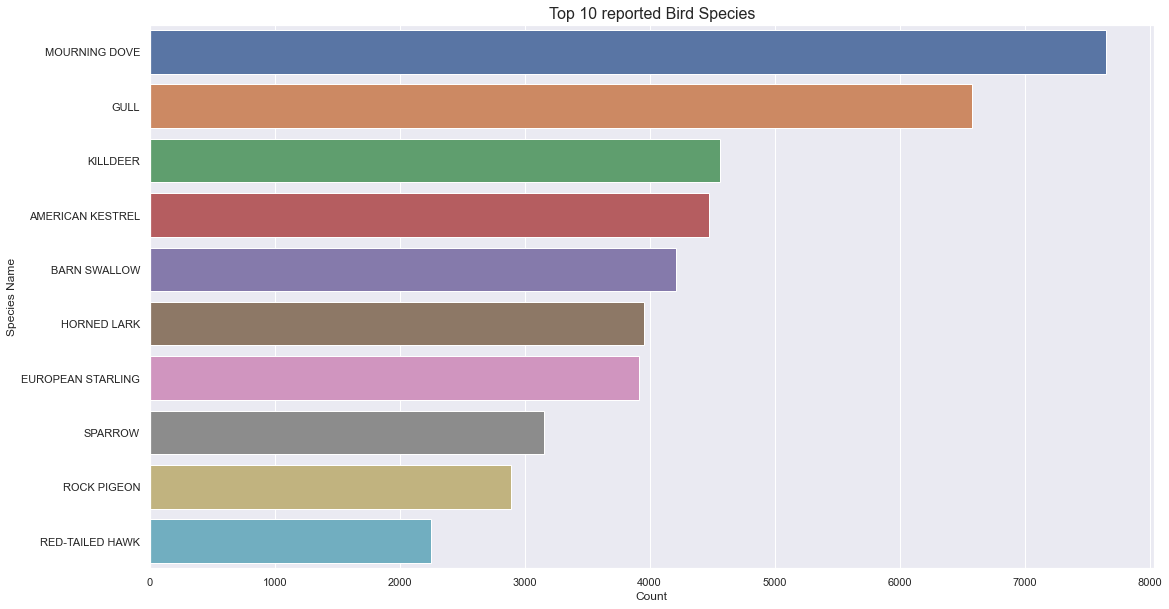

In [57]:
# Grouping accidents by Species, ordered by number of reports
birdSpecies: pd.DataFrame = df.groupby('Species ID').agg({'Record ID': 'count', 'Species Name': 'unique'}).sort_values('Record ID', ascending=False).reset_index()
# Grabbing the Name of the species
birdSpecies['Species Name']: pd.Series = birdSpecies['Species Name'].apply(lambda x: x[0])
# Removing Unknown Birds
birdSpecies.dropna(inplace=True)
birdSpecies: pd.DataFrame = birdSpecies[birdSpecies['Species Name'].str.startswith('UNKNOWN') == False]
# Plotting
birdSpecies.rename(columns={'Record ID': 'Count'}, inplace=True)
sns.barplot(data=birdSpecies[:10], y='Species Name', x='Count')
plt.title('Top 10 reported Bird Species')
plt.show()

In [58]:
birdSpecies["Relative Percentage"]: pd.Series = birdSpecies["Count"] / int(birdSpecies[birdSpecies["Species Name"] == "MOURNING DOVE"]["Count"])
birdSpecies["Absolute Percentage"]: pd.Series = birdSpecies["Count"] / birdSpecies["Count"].sum()
birdSpecies.head(10)

,Species ID,Count,Species Name,Relative Percentage,Absolute Percentage
2,O2205,7653,MOURNING DOVE,1.000000,0.082089
3,NE1,6580,GULL,0.859794,0.070580
5,N5111,4562,KILLDEER,0.596106,0.048934
6,K5114,4476,AMERICAN KESTREL,0.584869,0.048011
7,YI005,4215,BARN SWALLOW,0.550764,0.045212
8,YH004,3952,HORNED LARK,0.516399,0.042391
9,YL001,3915,EUROPEAN STARLING,0.511564,0.041994
10,ZX3,3152,SPARROW,0.411865,0.033810
11,O2111,2893,ROCK PIGEON,0.378022,0.031031
13,K3302,2254,RED-TAILED HAWK,0.294525,0.024177


Mourning dove is the most common bird reported by a wide margin, being ~14.1% more common than the gull and ~40.4% more common than the killdeer. However, it is present only on 8% of reports, meaning there are other species that are not as invovlved in many accidents as the mourning dove, but they are still relevant in data analysis.

### In general, what aircraft parts are more affected?

In [59]:
## O que podemos dizer sobre as aves envolvidas em acidentes se separarmos os dados pelas partes dos aviões que foram danificadas?

### In which Flight Phases are accidents more common?

In [60]:
## As condições climáticas, **etapas do voo** e altura/velocidade do avião influenciam no número de acidentes?

### Can we predict the number of accidents using a linear regression?

In [61]:
## Podemos prever bem o número de acidentes utilizando uma regressão linear? Separar por épocas do ano melhora o resultado?